In [1]:
import requests
import numpy as np
import xarray as xr

import os
import ftplib
import getpass
import cartopy.crs as ccrs
import cartopy.feature as cft
import cartopy.mpl.geoaxes as cmplgeo
import cartopy.mpl.gridliner as cmplgrid
import matplotlib.pyplot as plt
%matplotlib inline

## Download files from ftp

In [10]:
def download_file_from_ftp(ftp, filename, target_directory):
    try:
        local_filepath = os.path.join(target_directory, filename)
        with open(local_filepath, 'wb') as file:
            ftp.retrbinary('RETR %s' % filename, file.write)
            print(f"Downloaded {filename}")
    except Exception as e:
        print(f"Error downloading {filename}: {e}")

def main_SWOT_L3_basic():
    # Set up directories
    # ftpAVISO = 'ftp-access.aviso.altimetry.fr'
    # #ftp_L3_basic_path = '/data/swot_beta_products/l3_karin_nadir/1day_orbit/basic/alpha_v0_2/'
    # #filename = 'SWOT_L3_LR_SSH_Basic_488_007_20230412T005730_20230412T014836_v0.2.nc'
    # ftp_L3_basic_path = '/data/l3_karin_nadir/21day_orbit/basic/v0_3/'
    # filename = 'SWOT_L3_LR_SSH_Basic_006_322_20231114T003341_20231114T012508_v0.3.nc'
    # SWOT_L3_SSH = '/home3/sreich/swot/L3_aviso/'

    # try:
    #     # Logging into FTP server using SWOT ST credentials
    #     with ftplib.FTP(ftpAVISO) as ftp:
    #         ftp.login("swot_st", "swot_st;23")
    #         ftp.cwd(ftp_L3_basic_path)
    #         print(f"Connection Established {ftp.getwelcome()}")

    #         # Check if the file exists in the directory
    #         if filename in ftp.nlst():
    #             download_file_from_ftp(ftp, filename, SWOT_L3_SSH)
    #         else:
    #             print(f"File {filename} does not exist in the directory.")
    # except Exception as e:
    #     print(f"Error: {e}")


    ftpAVISO = 'ftp-access.aviso.altimetry.fr'
    #ftp_L3_basic_path = '/data/swot_beta_products/l3_karin_nadir/1day_orbit/basic/alpha_v0_2/'
    #filename = 'SWOT_L3_LR_SSH_Basic_488_007_20230412T005730_20230412T014836_v0.2.nc'
    #ftp_L3_basic_path = '/data/l3_karin_nadir/21day_orbit/basic/v0_3/'
    ftp_L3_basic_path = '/swot_beta_products/l3_karin_nadir/1day_orbit/basic/v0_3/'
    filename = 'SWOT_L3_LR_SSH_Basic_474_007_20230329T030839_20230329T035945_v0.3.nc'
    SWOT_L3_SSH = '/home3/sreich/swot/L3_aviso/'

    try:
        # Logging into FTP server using SWOT ST credentials
        with ftplib.FTP(ftpAVISO) as ftp:
            ftp.login("swot_st", "swot_st;23")
            ftp.cwd(ftp_L3_basic_path)
            print(f"Connection Established {ftp.getwelcome()}")

            # Check if the file exists in the directory
            if filename in ftp.nlst():
                download_file_from_ftp(ftp, filename, SWOT_L3_SSH)
            else:
                print(f"File {filename} does not exist in the directory.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main_SWOT_L3_basic()

# def main_SWOT_L3_expert():
#     # Set up directories
#     ftpAVISO = 'ftp-access.aviso.altimetry.fr'
#     #ftp_L3_expert_path = '/data/swot_beta_products/l3_karin_nadir/1day_orbit/expert/alpha_v0_2/'
#     ftp_L3_expert_path = '/data/l3_karin_nadir/21day_orbit/expert/v0_3/'
#     #filename = 'SWOT_L3_LR_SSH_Expert_488_007_20230412T005730_20230412T014836_v0.2.nc'
#     filename = 'SWOT_L3_LR_SSH_Expert_006_322_20231114T003341_20231114T012508_v0.3.nc'
#     SWOT_L3_SSH = '/home3/sreich/swot/L3_aviso/'  # Replace with the desired directory

#     try:
#         # Logging into FTP server using SWOT ST credentials
#         with ftplib.FTP(ftpAVISO) as ftp:
#             ftp.login("swot_st", "swot_st;23")
#             ftp.cwd(ftp_L3_expert_path)
#             print(f"Connection Established {ftp.getwelcome()}")

#             # Check if the file exists in the directory
#             if filename in ftp.nlst():
#                 download_file_from_ftp(ftp, filename, SWOT_L3_SSH)
#             else:
#                 print(f"File {filename} does not exist in the directory.")
#     except Exception as e:
#         print(f"Error: {e}")

# if __name__ == "__main__":
#     main_SWOT_L3_expert()

Error: [Errno 110] Connection timed out


In [2]:
def ftp_data_access(ftp_path, filename):
    # Set up FTP server details
    ftpAVISO = 'ftp-access.aviso.altimetry.fr'

    try:
        # Prompt for username and password
        username = input("Enter username: ")
        password = getpass.getpass(prompt=f"Enter password for {username}: ")

        # Logging into FTP server using provided credentials
        with ftplib.FTP(ftpAVISO) as ftp:
            ftp.login(username, password)
            ftp.cwd(ftp_path)
            print(f"Connection Established {ftp.getwelcome()}")

            # Check if the file exists in the directory
            if filename in ftp.nlst():
                local_filepath = input("Enter the local directory to save the file: ")
                download_file_from_ftp(ftp, filename, local_filepath)
            else:
                print(f"File {filename} does not exist in the directory.")
    except ftplib.error_perm as e:
        print(f"FTP error: {e}")
    except Exception as e:
        print(f"Error: {e}")

def download_file_from_ftp(ftp, filename, target_directory):
    try:
        local_filepath = os.path.join(target_directory, filename)
        with open(local_filepath, 'wb') as file:
            ftp.retrbinary('RETR %s' % filename, file.write)
            print(f"Downloaded {filename} to {local_filepath}")
    except Exception as e:
        print(f"Error downloading {filename}: {e}")

In [7]:
# Define directories
ftp_path = '/data/l3_karin_nadir/1day_orbit/basic/v0_3/'
filename = 'SWOT_L3_LR_SSH_Basic_550_012_20230612T193204_20230612T202309_v0.3.nc'

# FTP download
ftp_data_access(ftp_path, filename)

Enter username:  swot_st
Enter password for swot_st:  ········


Error: [Errno 110] Connection timed out


In [3]:
# Set file names
basic = os.path.join('/home/shoshi/swot/L3_aviso/', "SWOT_L3_LR_SSH_Basic_006_322_20231114T003341_20231114T012508_v0.3.nc")
expert = os.path.join('/home/shoshi/swot/L3_aviso/', "SWOT_L3_LR_SSH_Expert_006_322_20231114T003341_20231114T012508_v0.3.nc")

## Basic product content
This product contains two versions of the sea level anomaly (ssha). The ssha_noiseless field is obtained by denoising the ssha field. The mean dynamic topography is also included in order to derive the absolute dynamic topography. Finally, the nadir sea level anomaly has been combined in the KaRIn swath, with the i_num_line and i_num_pixel fields indexing its location in the grid.

In [4]:
ds_basic =  xr.open_dataset(basic)
[v for v in ds_basic.variables]

ds_basic

<xarray.Dataset>
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 2013)
Coordinates:
    latitude        (num_lines, num_pixels) float64 ...
    longitude       (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] ...
    mdt             (num_lines, num_pixels) float64 ...
    ssha            (num_lines, num_pixels) float64 ...
    ssha_noiseless  (num_lines, num_pixels) float64 ...
    i_num_line      (num_nadir) int16 ...
    i_num_pixel     (num_nadir) int8 ...
Attributes: (12/42)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              8.1e-05
    geospatial_lon_max:              359.999908
    doi:                             10.24400/527896/a01-2023.017
    data_used:                       L2 SWOT (NASA/CNES). DOI associated : ht...

## Expert product content
This product contains all the Basic fields, and additionnal fields that allows
a deeper investigation by Expert users. This includes the corrections used for
the SLA and the currents (absolute and relative) computed for the denoised SLA.

In [5]:
ds_expert = xr.open_dataset(expert)
[v for v in ds_expert.variables if v not in ds_basic]
ds_expert = ds_expert.assign_coords(longitude=(((ds_expert.longitude + 180) % 360) - 180))

ds_expert

<xarray.Dataset>
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 2013)
Coordinates:
    latitude              (num_lines, num_pixels) float64 ...
    longitude             (num_lines, num_pixels) float64 -98.77 ... 68.15
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines) datetime64[ns] ...
    mdt                   (num_lines, num_pixels) float64 ...
    ssha                  (num_lines, num_pixels) float64 ...
    ssha_noiseless        (num_lines, num_pixels) float64 ...
    ssha_unedited         (num_lines, num_pixels) float64 ...
    quality_flag          (num_lines, num_pixels) int8 ...
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 ...
    vgosa                 (num_lines, num_pixels) float64 ...
    sigma0                (num_lines, num_pixels) float64 ...
    i_num_line            (num_nadir) int16 ...
    i_num_pixel           (num_nadir) int8 ...
    cross_track_distance  (num_pixels) float64 ...
Attributes: (12/42)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              8.1e-05
    geospatial_lon_max:              359.999908
    doi:                             10.24400/527896/a01-2023.018
    data_used:                       L2 SWOT (NASA/CNES). DOI associated : ht...

Text(0.5, 1.0, 'SWOT SSHA')

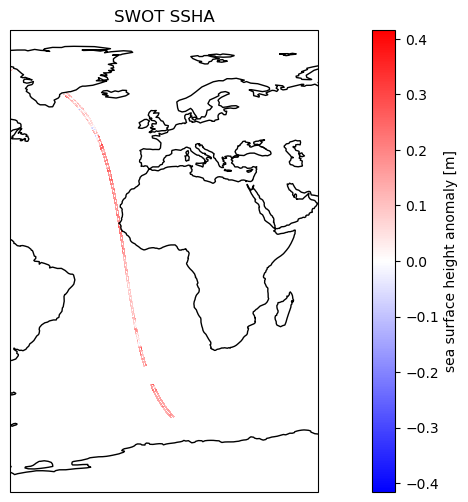

In [8]:

plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_expert.ssha.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", cmap='bwr',add_colorbar=True
)
ax.coastlines()
#ax.set_ylim([-20, 20])
ax.set_xlim([-60,60])
plt.title('SWOT SSHA')

In [35]:
np.nanmin(ds_expert.ssha.values), np.nanmax(ds_expert.ssha.values), 

(-0.1509, 0.4158)

In [36]:
ds_expert['ssha_qual'] = ds_expert['ssha'].where(ds_expert['quality_flag'] == 0)
ds_expert['ssha_tide'] = ds_expert['ssha_qual'] + ds_expert['ocean_tide']
ds_expert

<xarray.Dataset>
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 2013)
Coordinates:
    latitude              (num_lines, num_pixels) float64 78.27 78.25 ... -78.27
    longitude             (num_lines, num_pixels) float64 -98.77 ... 68.15
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/20)
    time                  (num_lines) datetime64[ns] ...
    mdt                   (num_lines, num_pixels) float64 ...
    ssha                  (num_lines, num_pixels) float64 nan nan ... nan nan
    ssha_noiseless        (num_lines, num_pixels) float64 ...
    ssha_unedited         (num_lines, num_pixels) float64 ...
    quality_flag          (num_lines, num_pixels) int8 1 1 1 1 1 1 ... 1 1 1 1 1
    ...                    ...
    sigma0                (num_lines, num_pixels) float64 ...
    i_num_line            (num_nadir) int16 ...
    i_num_pixel           (num_nadir) int8 ...
    cross_track_distance  (num_pixels) float64 ...
    ssha_qual             (num_lines, num_pixels) float64 nan nan ... nan nan
    ssha_tide             (num_lines, num_pixels) float64 nan nan ... nan nan
Attributes: (12/42)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              8.1e-05
    geospatial_lon_max:              359.999908
    doi:                             10.24400/527896/a01-2023.018
    data_used:                       L2 SWOT (NASA/CNES). DOI associated : ht...

Text(0.5, 1.0, 'SWOT Expert SSH')

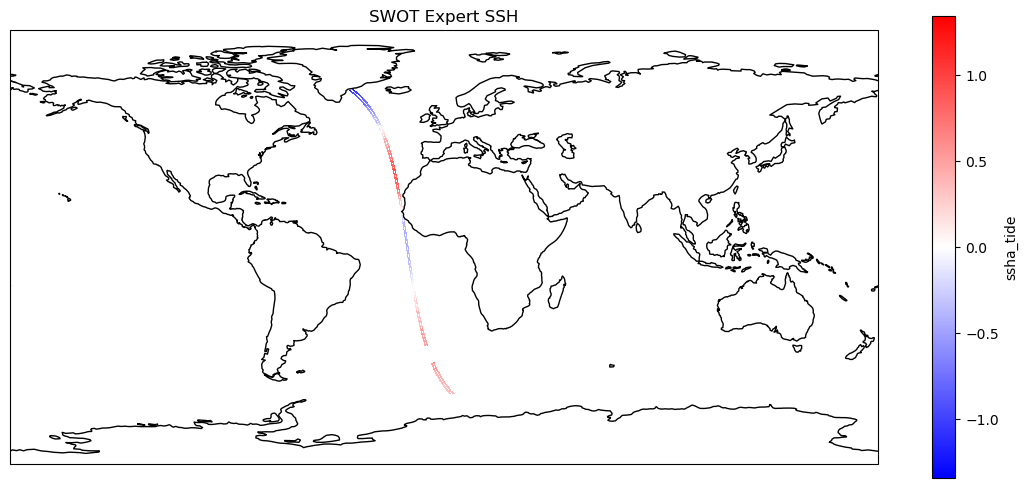

In [37]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_expert.ssha_tide.plot.pcolormesh(
               ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", cmap='bwr',add_colorbar=True
)
ax.coastlines()
#ax.set_ylim([-30, 30])
#ax.set_xlim([-60,60])
plt.title('SWOT Expert SSH')

In [9]:
np.unique(ds_expert.ssha_qual.values, return_counts=True)

(array([-0.0416, -0.041 , -0.0408, ...,  0.4147,  0.4218,     nan]),
 array([     1,      1,      1, ...,      1,      1, 392501]))

In [11]:
np.unique(ds_expert.ssha.values, return_counts=True)

(array([-0.0416, -0.041 , -0.0408, ...,  0.4147,  0.4218,     nan]),
 array([     1,      1,      1, ...,      1,      1, 390988]))

In [15]:
ds_basic['ssha_qual'] = ds_basic['ssha'].where(ds_expert['quality_flag'] == 0)
ds_basic

<xarray.Dataset>
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 1513)
Coordinates:
    latitude        (num_lines, num_pixels) float64 -77.05 -77.07 ... 77.05
    longitude       (num_lines, num_pixels) float64 276.6 276.6 ... 83.56 83.56
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] ...
    mdt             (num_lines, num_pixels) float64 ...
    ssha            (num_lines, num_pixels) float64 nan nan nan ... nan nan nan
    ssha_noiseless  (num_lines, num_pixels) float64 ...
    i_num_line      (num_nadir) int16 ...
    i_num_pixel     (num_nadir) int8 ...
    ssha_qual       (num_lines, num_pixels) float64 nan nan nan ... nan nan nan
Attributes: (12/42)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    geospatial_lat_min:              -78.271942
    geospatial_lat_max:              78.272019
    geospatial_lon_min:              5e-06
    geospatial_lon_max:              359.999986
    doi:                             10.24400/527896/a01-2023.017
    data_used:                       L2 SWOT (NASA/CNES). DOI associated : ht...

In [16]:
np.unique(ds_basic.ssha_qual.values - ds_expert.ssha_qual.values)

array([ 0., nan])

In [17]:
np.unique(ds_expert.ssha.values - ds_expert.ssha_qual.values)

array([ 0., nan])

In [18]:
np.nanmin(ds_expert.ssha_qual.values), np.nanmax(ds_expert.ssha_qual.values)

(-0.041600000000000005, 0.4218)